# The Lincoln Index Problem

Copyright 2020 Allen B. Downey

License: [Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [1]:
# If we're running on Colab, install libraries

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install pymc3
    !pip install arviz
    !pip install graphviz

In [an excellent blog post](http://www.johndcook.com/blog/2010/07/13/lincoln-index/), John D. Cook wrote about the Lincoln index, which is a way to estimate the
number of errors in a document (or program) by comparing results from
two independent testers. 

Here's his presentation of the problem:

>"Suppose you have a tester who finds 20 bugs in your program. You
want to estimate how many bugs are really in the program. You know
there are at least 20 bugs, and if you have supreme confidence in your
tester, you may suppose there are around 20 bugs. But maybe your
tester isn't very good. Maybe there are hundreds of bugs. How can you
have any idea how many bugs there are? There's no way to know with one
tester. But if you have two testers, you can get a good idea, even if
you don't know how skilled the testers are."

Suppose the first tester finds 20 bugs, the second finds 15, and they
find 3 in common; how can we estimate the number of bugs?

I'll use the following notation for the data:

For this model, I'll express the data in different notation:

* k11 is the number of bugs found by both testers,

* k10 is the number of bugs found by the first tester but not the second,

* k01 is the number of bugs found by the second tester but not the first, and

* k00 is the unknown number of undiscovered bugs.

Here are the values for all but `k00`:

In [2]:
k10 = 20 - 3
k01 = 15 - 3
k11 = 3

In [3]:
num_seen = k01 + k10 + k11
num_seen

32

Here's the model:

In [4]:
import pymc3 as pm

with pm.Model() as model5:
    p0 = pm.Beta('p0', alpha=1, beta=1)
    p1 = pm.Beta('p1', alpha=1, beta=1)
    N = pm.DiscreteUniform('N', num_seen, 350)
    
    q0 = 1-p0
    q1 = 1-p1
    ps = [q0*q1, q0*p1, p0*q1, p0*p1]
    
    k00 = N - num_seen
    data = pm.math.stack((k00, k01, k10, k11))
    y = pm.Multinomial('y', n=N, p=ps, observed=data)

In [5]:
with model5:
    trace5 = pm.sample(500)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [p1, p0]
>Metropolis: [N]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:01<00:00, 1577.49draws/s]
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


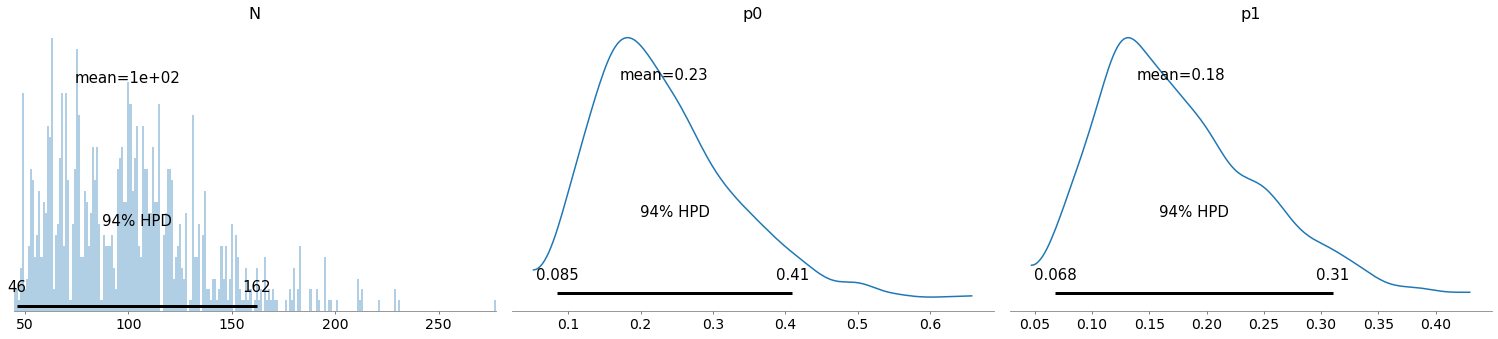

In [7]:
with model5:
    pm.plot_posterior(trace5)

AttributeError: 'int' object has no attribute 'astype'

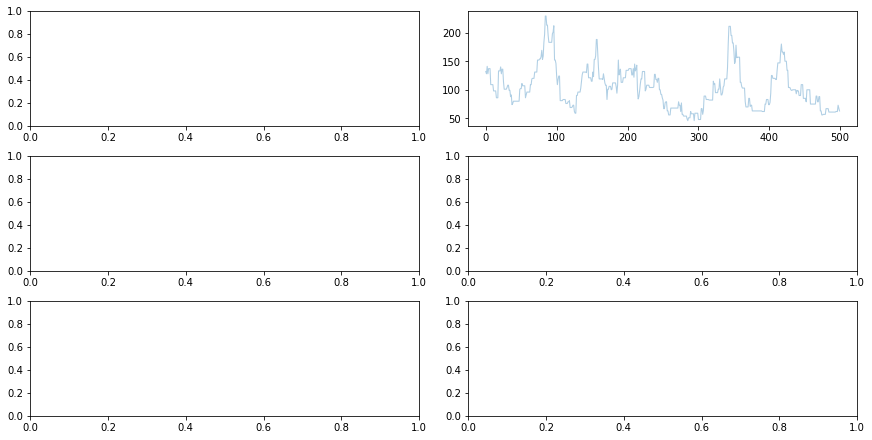

In [6]:
with model5:
    pm.traceplot(trace5)